In [1]:
# !pip install split_folder

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode="sparse",
#     save_to_dir = "AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [5]:
# for image_batch, label_batch in train_generator:
#     print(image_batch.shape)
#     break

In [6]:
class_names = list(train_generator.class_indices.keys())

In [7]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
# dir(train_generator)

In [9]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True,
)

validation_generator = train_datagen.flow_from_directory(
    "dataset/val",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode="sparse",
#     save_to_dir = "AugmentedImages"
)

Found 215 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True,
)

test_generator = train_datagen.flow_from_directory(
    "dataset/test",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode="sparse",
#     save_to_dir = "AugmentedImages"
)

Found 431 images belonging to 3 classes.


In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation="relu",input_shape=input_shape),  
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=n_classes, activation='softmax')
])

# model.build(input_shape=input_shape )

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [14]:
1506/32 ## training sample/std_size_batch

47.0625

In [15]:
215/32

6.71875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    epochs = 20
)

Epoch 1/20
47/47 [==============================] - 58s 1s/step - loss: 0.9208 - accuracy: 0.4715 - val_loss: 0.8905 - val_accuracy: 0.4844
Epoch 2/20
47/47 [==============================] - 59s 1s/step - loss: 0.8242 - accuracy: 0.6052 - val_loss: 0.8134 - val_accuracy: 0.5885
Epoch 3/20
47/47 [==============================] - 58s 1s/step - loss: 0.6687 - accuracy: 0.6882 - val_loss: 0.4708 - val_accuracy: 0.7865
Epoch 4/20
47/47 [==============================] - 57s 1s/step - loss: 0.4466 - accuracy: 0.8148 - val_loss: 0.4442 - val_accuracy: 0.8229
Epoch 5/20
47/47 [==============================] - 57s 1s/step - loss: 0.3331 - accuracy: 0.8664 - val_loss: 0.3441 - val_accuracy: 0.8594
Epoch 6/20
47/47 [==============================] - 59s 1s/step - loss: 0.2900 - accuracy: 0.8915 - val_loss: 0.3035 - val_accuracy: 0.8542
Epoch 7/20
47/47 [==============================] - 58s 1s/step - loss: 0.2994 - accuracy: 0.8779 - val_loss: 0.2768 - val_accuracy: 0.8906
Epoch 8/20
47/47 [==

In [17]:
print(f"Training  gen score:- {model.evaluate(train_generator)}")
print(f"Testing  gen score:- {model.evaluate(test_generator)}")
print(f"Validation  gen score:- {model.evaluate(validation_generator)}")

48/48 [==============================] - 28s 588ms/step - loss: 0.0496 - accuracy: 0.9854
Training  gen score:- [0.04964831471443176, 0.9853917956352234]
14/14 [==============================] - 7s 514ms/step - loss: 0.1079 - accuracy: 0.9698
Testing  gen score:- [0.10788062959909439, 0.9698376059532166]
7/7 [==============================] - 4s 494ms/step - loss: 0.0801 - accuracy: 0.9721
Validation  gen score:- [0.08009448647499084, 0.9720930457115173]


In [18]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [21]:
EPOCHS = 20

In [22]:
acc =history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

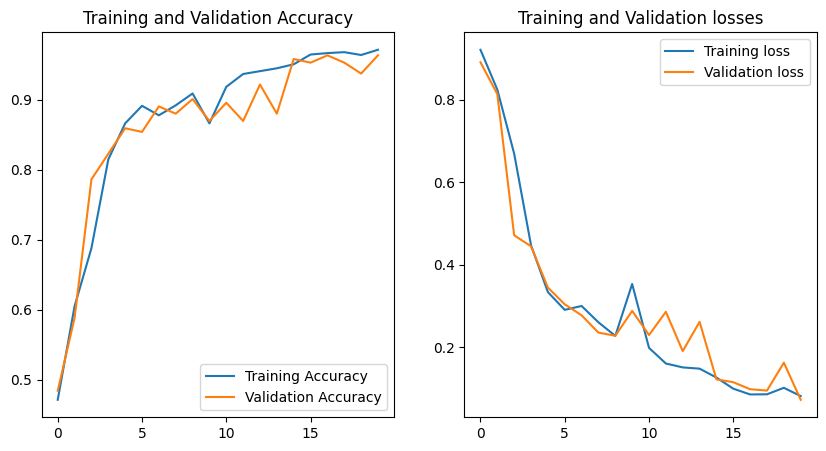

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training loss")
plt.plot(range(EPOCHS), val_loss, label="Validation loss")
plt.legend(loc="upper right")
plt.title("Training and Validation losses")
plt.show()

First Image to predict
Actual Label: Potato___Late_blight
1/1 [==============================] - 0s 261ms/step
predicted label Potato___Late_blight


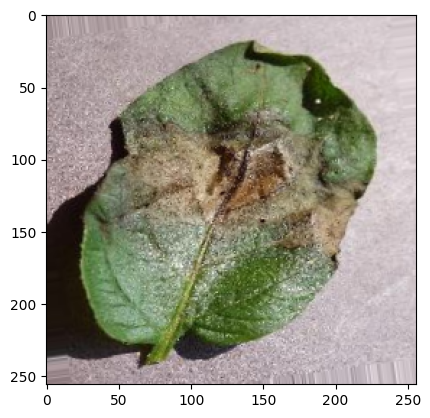

In [35]:
import numpy as np

# plt.figure(figsize=(10,5))
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
#     print(first_image)
    print("First Image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[first_label])
#     print(first_label)
    batch_prediction = model.predict(image_batch)
    print("predicted label", class_names[np.argmax(batch_prediction[0])])
    break

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i])
    img_array = tf.expand_dims(img_array,0) # create a batch

    prediction = model.predict(img_array)
    
    result = np.argmax(batch_prediction[0])
    prediction_class = class_names[result]
    
    confidence = round(100 * (np.max(prediction[0])),2)
    return prediction_class, confidence

1/1 [==============================] - 0s 30ms/step


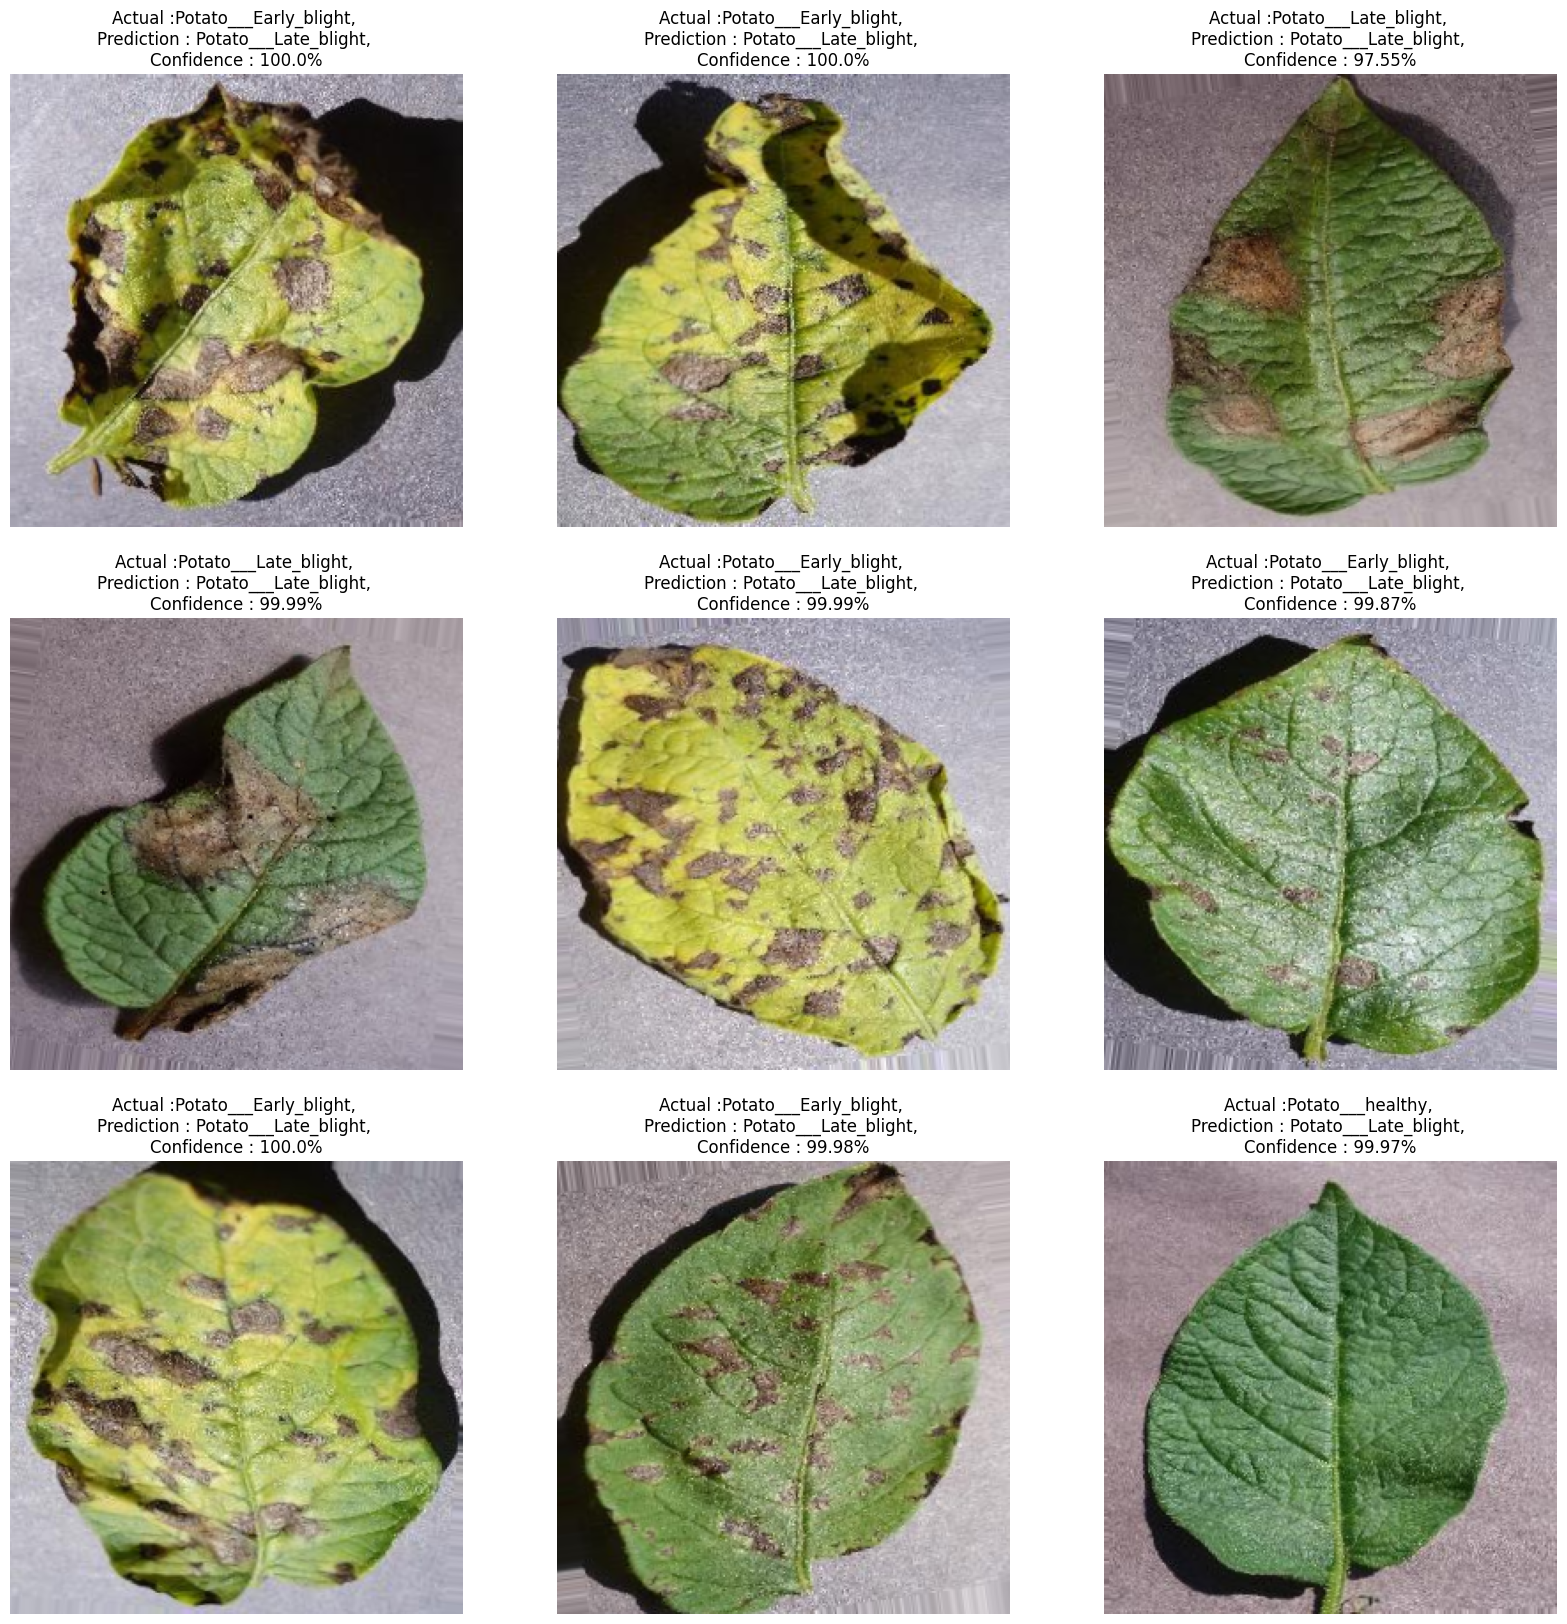

In [41]:
plt.figure(figsize=(20,20))
for image, label in test_generator:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i])
        
        prediction_class, confidence = predict(model, image[i])
        actual_class = class_names[int(label[i])]
        
        plt.title(f"Actual :{actual_class}, \nPrediction : {prediction_class}, \nConfidence : {confidence}%")
        plt.axis("off")
    break

In [43]:
model.save("./potatoes.h5")